<a href="https://colab.research.google.com/github/naincyjoshi/FlipRobo-/blob/main/image_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import shutil

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!nvidia-smi

Sun Nov 28 11:27:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    36W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [5]:
!pip install tensorflow-gpu

     |████████████████████████████████| 489.6 MB 23 kB/s 


In [6]:
!apt-get install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


!pip install keras

In [7]:
!pip install keras

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [60]:
# import the libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
# from Keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import tensorflow as tf
from IPython.display import Image, display

In [5]:
# resize all the image to same size
Imaze_SIZE = [224,224]
train_path = "/content/drive/MyDrive/Hindu paper/Dataset/Train_data"
test_path = "/content/drive/MyDrive/Hindu paper/Dataset/Test_data"

# Import the Inception V3 library as shown below and ass preprocesing layer to the front of VGG
# Here we will be using imagenet weights

inception= InceptionV3(input_shape=Imaze_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [6]:
# Don't train the existing weights
for layer in inception.layers:
  layer.trainable= False

In [7]:
# useful for g 
folders = glob('/content/drive/MyDrive/Hindu paper/Dataset/Train_data/*')
folders

['/content/drive/MyDrive/Hindu paper/Dataset/Train_data/Trousers',
 '/content/drive/MyDrive/Hindu paper/Dataset/Train_data/Saree',
 '/content/drive/MyDrive/Hindu paper/Dataset/Train_data/Jeans']

In [8]:
# our layers- we can add more if we want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders),activation='softmax')(x)

In [10]:
# create a model Object
model = Model(inputs=inception.input,outputs=prediction)

In [11]:
# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [12]:
# tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
# use the ImageDataGenerator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# make sure that we provide the same target size as initiated for the imaze size
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Hindu paper/Dataset/Train_data',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')



Found 164 images belonging to 3 classes.


In [15]:
training_set.class_indices

{'Jeans': 0, 'Saree': 1, 'Trousers': 2}

In [54]:
t_img , label =training_set.next()

In [58]:
def plotImages(img_arr, label):
  """
  input:image array
  output:plot images
  """
  for idx ,img in enumerate(img_arr):
    if idx <= 10:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.show() 


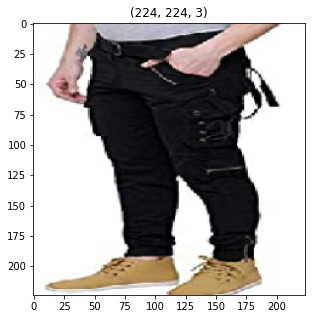

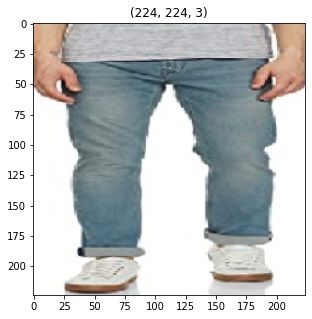

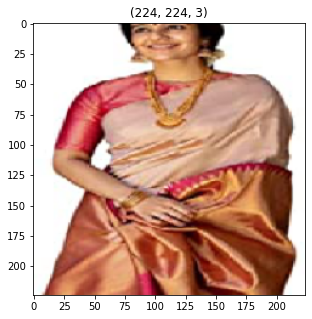

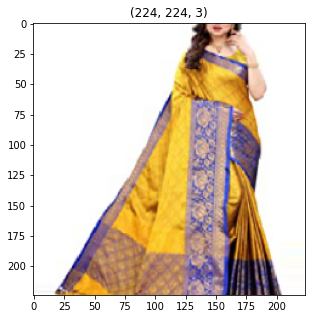

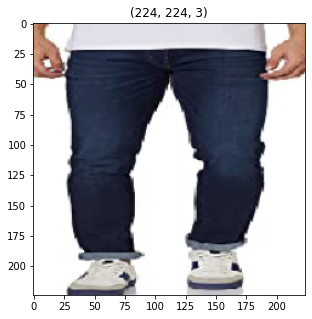

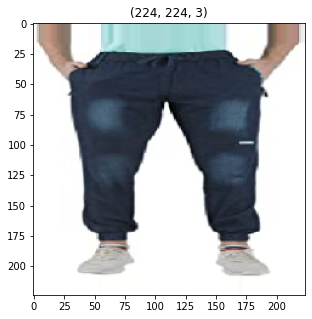

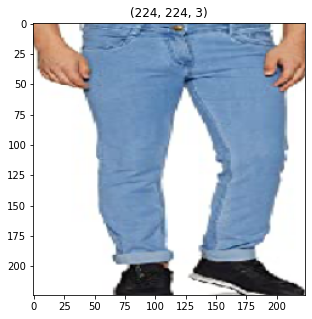

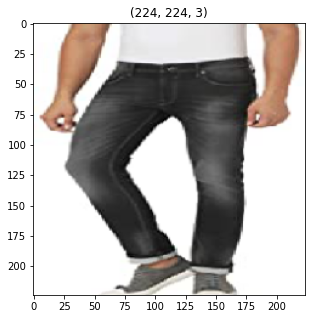

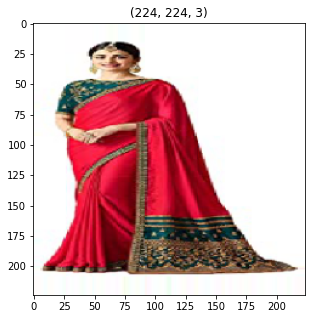

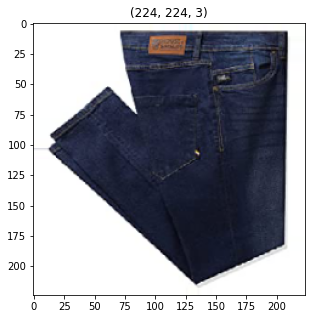

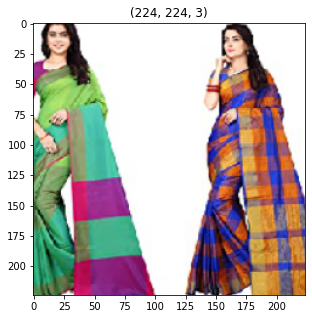

In [59]:
plotImages(t_img, label)

In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Hindu paper/Dataset/Test_data',
                                            target_size=(224,224),
                                            batch_size=16,
                                            class_mode='categorical')

Found 38 images belonging to 3 classes.


In [17]:
#fit the model
#Run the cell .It will take some time to execute
r=model.fit_generator(training_set,
                      validation_data=test_set,
                      epochs=10,
                      steps_per_epoch=len(training_set),
                      validation_steps=len(test_set)
                      )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
6/6 [==============================] - 54s 6s/step - loss: 3.7272 - accuracy: 0.4878 - val_loss: 1.2872 - val_accuracy: 0.8158
Epoch 2/10
6/6 [==============================] - 3s 570ms/step - loss: 1.9289 - accuracy: 0.7683 - val_loss: 3.0203 - val_accuracy: 0.7368
Epoch 3/10
6/6 [==============================] - 3s 463ms/step - loss: 1.3629 - accuracy: 0.8293 - val_loss: 1.5753 - val_accuracy: 0.8158
Epoch 4/10
6/6 [==============================] - 3s 483ms/step - loss: 0.7134 - accuracy: 0.8963 - val_loss: 0.6317 - val_accuracy: 0.8684
Epoch 5/10
6/6 [==============================] - 3s 480ms/step - loss: 0.5480 - accuracy: 0.8720 - val_loss: 0.5812 - val_accuracy: 0.8684
Epoch 6/10
6/6 [==============================] - 3s 467ms/step - loss: 0.3523 - accuracy: 0.9268 - val_loss: 0.8165 - val_accuracy: 0.8684
Epoch 7/10
6/6 [==============================] - 3s 475ms/step - loss: 0.6169 - accuracy: 0.9146 - val_loss: 1.4527 - val_accuracy: 0.7895
Epoch 8/10
6/6 [======

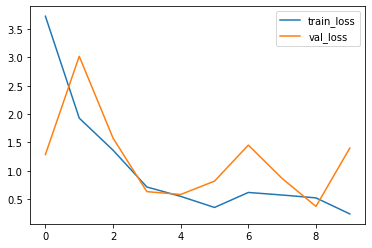

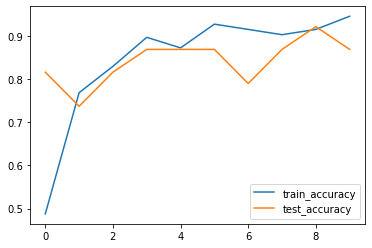

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy

plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy over Epochs')



In [19]:
# Save the Model

model.save('model_vgg16_ImageClassificationcomplete')
model.save('model_vgg16_tf',save_format='tf')
model.save('model_vgg16.h5')

INFO:tensorflow:Assets written to: model_vgg16_ImageClassificationcomplete/assets
INFO:tensorflow:Assets written to: model_vgg16_tf/assets


In [20]:
y_pred = model.predict(test_set)

In [21]:
y_pred

array([[5.33013605e-04, 0.00000000e+00, 9.99466956e-01],
       [9.99999642e-01, 0.00000000e+00, 3.04113911e-07],
       [0.00000000e+00, 1.00000000e+00, 1.28025673e-34],
       [1.00916659e-04, 0.00000000e+00, 9.99899030e-01],
       [2.77988632e-10, 9.52858935e-35, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.84894498e-08, 0.00000000e+00, 1.00000000e+00],
       [9.99901772e-01, 0.00000000e+00, 9.82057318e-05],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.63399602e-09, 0.00000000e+00, 1.00000000e+00],
       [3.21624602e-11, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 6.38699284e-37],
       [2.17331435e-05, 0.00000000e+00, 9.99978304e-01],
       [9.99999881e-01, 0.00000000e+00, 1.78098702e-07],
       [9.37903106e-01, 0.00000000e+00, 6.20969012e-02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.60383870e-10, 0.00000

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2])

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [67]:
test_img , label =test_set.next()

In [72]:
def plotImages(y_pred, label):
  """
  input:image array
  output:plot images
  """
  for idx ,img in enumerate(y_pred):
    if idx <= 10:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.show() 

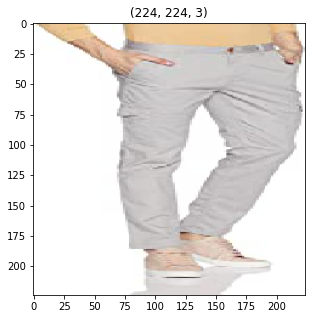

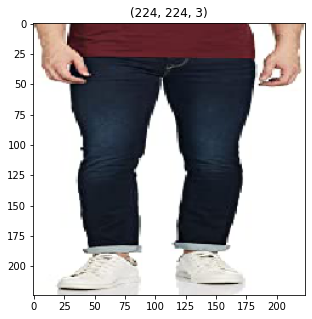

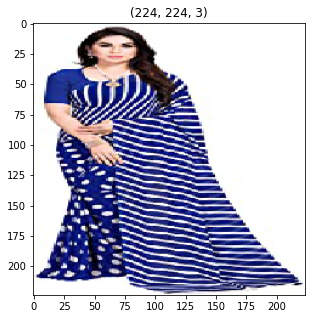

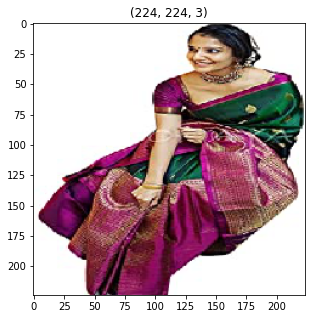

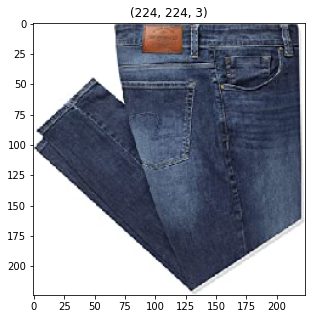

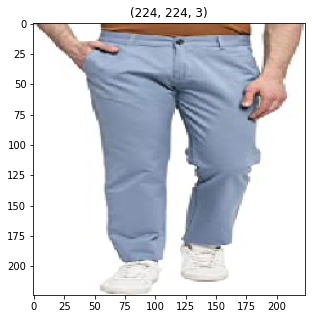

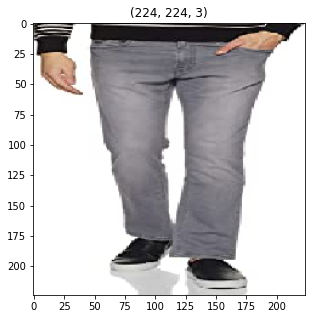

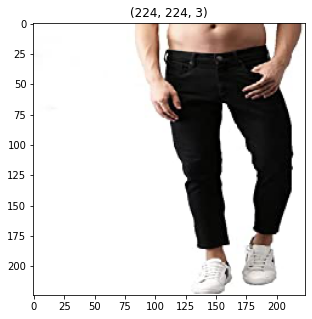

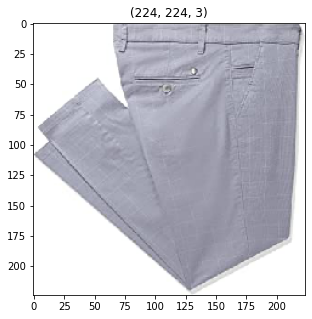

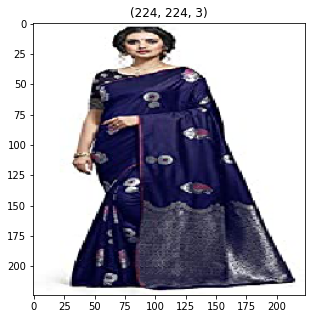

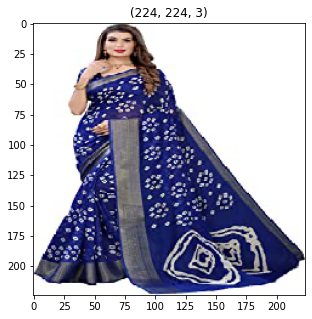

In [74]:
plotImages(test_img, label)

We Have Successfully Completed in testing the model.